<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 2nd exercise: <font color="#C70039">Work with Boxplots for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   26.10.2022
* Studend Name: Jüri Keller
* Studend matriculation number: 11133325

<img src="https://r-graph-gallery.com/img/other/boxplot_explanation.png" style="float: center;" width="800">
<img src="https://i2.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png?w=578" style="float: center;" width="800">


---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using boxplots to detect anomalies. Try to interpret the boxplot. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and create a boxplot for each of them
5. interpret the visual results and describe them
6. how can you test your data for being normally distributed? 
-----------------------------------------------------------------------------------

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
np.random.seed(1)

In [6]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
random_data = np.random.randn(50000)  * 20 + 20

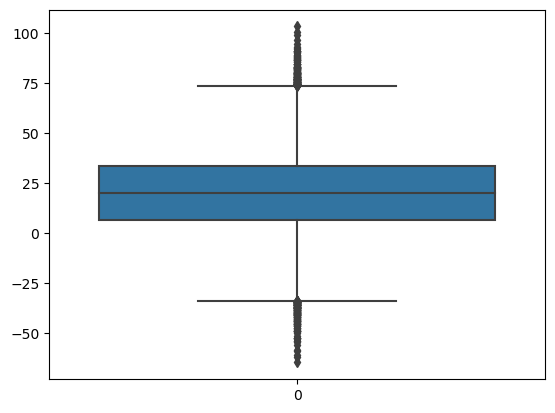

In [7]:
sns.boxplot(data=random_data)
plt.show()

In [8]:
from sklearn import datasets
import pandas as pd

### Iris (normal)

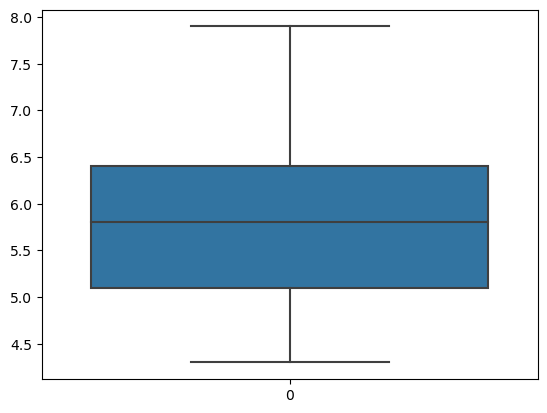

In [9]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris["data"], columns = iris["feature_names"])
data = iris_df["sepal length (cm)"].sort_values().reset_index(drop=True)

sns.boxplot(data=data)
plt.show()

### Wine (normal)

In [10]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine["data"], columns = wine["feature_names"])
data = wine_df["color_intensity"].sort_values().reset_index(drop=True)

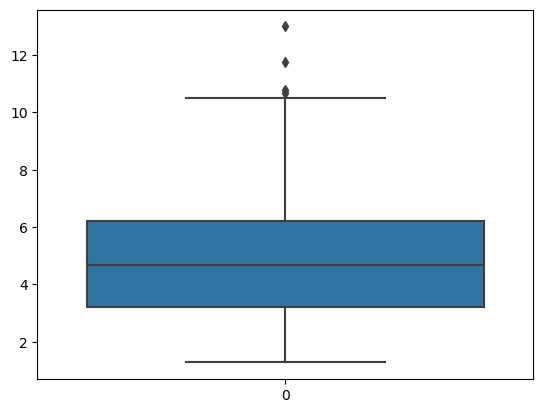

In [11]:
sns.boxplot(data=data)
plt.show()

### Titanic (not normal)

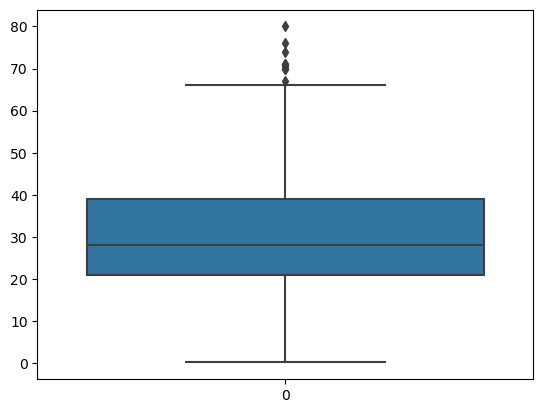

In [12]:
titanic = datasets.fetch_openml("titanic", version=1)
titanic_df = pd.DataFrame(titanic["data"], columns = titanic["feature_names"])
data = titanic_df["age"].sort_values().reset_index(drop=True)


sns.boxplot(data=data)
plt.show()

### 5. interpret the visual results and describe them
The boxplot shows:
- The median in as the middle line
- The data points that lay in the inter quartile range (IQR) as a blue box.
- Everything above that as lines, data 1.5 times the IQR above Q3 or below Q1
- the rest of the data points as potential outliers


### 6. how can you test your data for being normally distributed?
0. If the mean and the meadian are close to each other, the dataset might be normaly distributed
1. A histogram can help to get a first idea about the data. If the bins follow a normal distribution, it might be.
2. To be sure, if a distribution comes from a normal one, an omnibus test of normality with the nullhypothesis thet the distribution is normal distributed can be done. For an implementation and further information, please see Ex1.
